In [1]:
import json

import numpy as np
import seaborn as sns
from d3graph import d3graph, vec2adjmat
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN

from machine_learning.mapper.create_complex import create_complex

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (12, 8)

### dataset

In [3]:
np.random.seed(0)
n_samples = 500

theta = np.linspace(0, 2*np.pi, n_samples) 
e = np.random.uniform(-0.1, 0.1, n_samples)
f = np.random.uniform(-0.1, 0.1, n_samples)
X_0 = np.sin(theta) + e
X_1 = np.sin(theta) * np.cos(theta) + f
X = np.array([X_0, X_1]).T

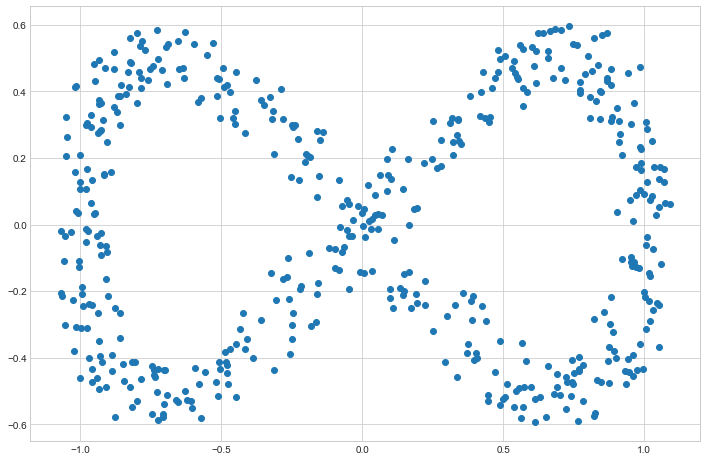

In [4]:
plt.figure(figsize=figsize)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### applying Mapper

In [5]:
Y = X[:, 0]

In [6]:
n_intervals = 8

overlap_ratio = 0.2

cluster_class = DBSCAN
cluster_params = {"eps": 0.15}

In [7]:
complex_ = create_complex(X, Y, n_intervals, overlap_ratio, cluster_class, cluster_params)

### saving complex

In [8]:
filepath = "figure_8.json"
with open(filepath, 'w') as f:
    json.dump(complex_, f)

### rendering complex
if R is installed then use machine_learning.mapper.render_complex.R instead of below

In [9]:
d3 = d3graph(verbose=60)

In [10]:
edge_sources = complex_.edge_sources
edge_targets = complex_.edge_targets
edge_values = complex_.edge_values

matrix = vec2adjmat(edge_sources, edge_targets, weight=edge_values)

In [11]:
vertex_sizes = complex_.vertex_sizes

d3.graph(matrix)
d3.set_node_properties(color=matrix.columns.values, size=np.array(vertex_sizes) / 10)  # scale vertex size down a bit
d3.show(filepath="./figure_8.html")  # default showfig=True seems ineffective in jupyter notebook, open html file instead